In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 1. Import libraries

In [ ]:
# Wildfire Size Classification Using Environmental and Meteorological Data
# Course: 5CS037 Concepts and Technologies of AI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression


from sklearn.neural_network import MLPRegressor


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


# 2. Load dataset

In [ ]:

df = pd.read_csv("database.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (23412, 21)


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# 3 . Dataset Info & Missing Values

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

# 4. Data Cleaning & Preprocessing

In [ ]:
# Target variable
TARGET = 'Magnitude'

# Drop rows with missing target
df = df.dropna(subset=[TARGET])


# Handle missing values (numeric only)
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


# Remove non-numeric columns (if any)
df = df[num_cols]

# 5 Target Distribution  EDA

 5.1 Box plot



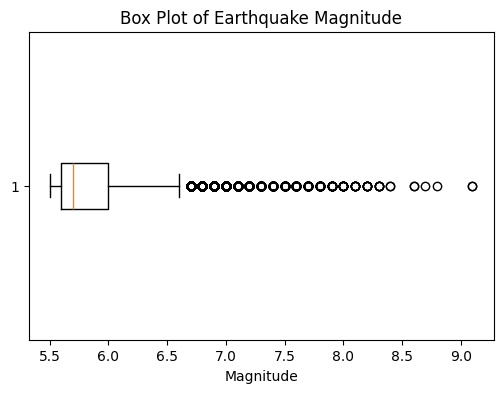

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(y, vert=False)
plt.xlabel("Magnitude")
plt.title("Box Plot of Earthquake Magnitude")
plt.show()


 5.2 Histogram (distribution)

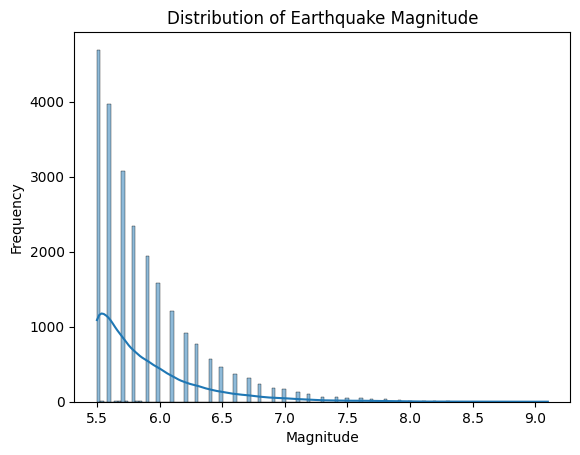

In [ ]:
# Distribution of target
plt.figure()
sns.histplot(df[TARGET], kde=True)
plt.title("Distribution of Earthquake Magnitude")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()


5.3 Correlation heatmap (only relevant features)

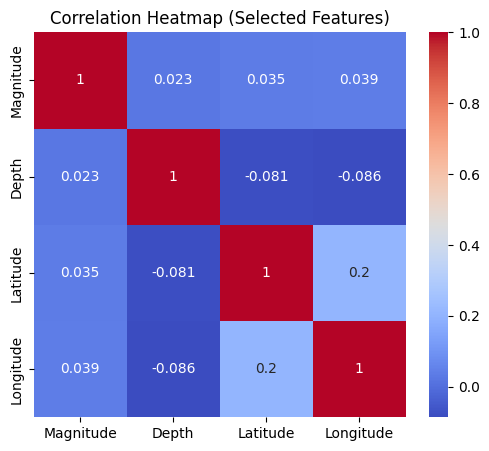

In [ ]:
selected_cols = ["Magnitude", "Depth", "Latitude", "Longitude"]
plt.figure(figsize=(6,5))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Selected Features)")
plt.show()


# 6 Train-Test Split

In [ ]:
X = df.drop(TARGET, axis=1)
y = df[TARGET]


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)


# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7 Neural Network Regression Model

In [ ]:
mlp = MLPRegressor(
hidden_layer_sizes=(64, 32),
activation='relu',
solver='adam',
max_iter=200,
random_state=42
)


mlp.fit(X_train_scaled, y_train)


y_pred_mlp = mlp.predict(X_test_scaled)


print("Neural Network Performance")

mae = mean_absolute_error(y_test, y_pred_mlp)
mse = mean_squared_error(y_test, y_pred_mlp)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_mlp)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Neural Network Performance
MAE: 0.286589155820782
RMSE: 0.4119961883646009
R2: 0.07972976807213406


# . Classical Model 1: Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)

# Classical Model 2: Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


y_pred_dt = dt.predict(X_test)

# 8 Evaluation Function

 Initial Model Comparison

In [ ]:
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}


 Initial Model Comparison

In [ ]:
initial_results = pd.DataFrame(
    [
        regression_metrics(y_test, y_pred_lr),
        regression_metrics(y_test, y_pred_dt)
    ],
    index=["Linear Regression", "Decision Tree"]
)

initial_results


,MAE,RMSE,R2
Linear Regression,0.303994,0.417770,0.053755
Decision Tree,0.377790,0.544645,-0.608260


# 9 Hyperparameter Tuning (Decision Tree)

In [ ]:
param_grid = {
'max_depth': [3, 5, 10, None],
'min_samples_split': [2, 5, 10]
}


grid = GridSearchCV(
DecisionTreeRegressor(random_state=42),
param_grid,
cv=5,
scoring='neg_mean_squared_error',
n_jobs=-1
)


grid.fit(X_train, y_train)

# Results
print("Best parameters for Linear Regression:", grid.best_params_)
print("Best CV RMSE:", np.sqrt(-grid.best_score_))


best_dt = grid.best_estimator_

print(best_dt)

Best parameters for Linear Regression: {'max_depth': 5, 'min_samples_split': 10}
Best CV RMSE: 0.39907961952872634
DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)


# 10 Feature Selection

---



In [ ]:
selector = SelectKBest(score_func=f_regression, k=8)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
X_test_sel = selector.transform(X_test_scaled)


selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['Latitude', 'Longitude', 'Depth Error', 'Depth Seismic Stations', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Root Mean Square']


# 11 Final Models with Selected Features

 Linear Regression (Selected + Scaled)

In [ ]:
lin_reg_final = LinearRegression()
lin_reg_final.fit(X_train_sel, y_train)

y_pred_lr_final = lin_reg_final.predict(X_test_sel)


 Decision Tree

In [ ]:
X_train_fs = X_train[selected_features]
X_test_fs = X_test[selected_features]

dt_final = DecisionTreeRegressor(
    max_depth=best_dt.max_depth,
    min_samples_split=best_dt.min_samples_split,
    random_state=42
)

dt_final.fit(X_train_fs, y_train)

y_pred_dt_final = dt_final.predict(X_test_fs)


# 12 Final Comparison Table

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression (using selected & scaled features)
cv_lr = cross_val_score(
    lin_reg_final,
    X_train_sel,
    y_train,
    cv=5,
    scoring='r2'
).mean()

# Cross-validation for Decision Tree (using selected features)
cv_dt = cross_val_score(
    dt_final,
    X_train_fs,
    y_train,
    cv=5,
    scoring='r2'
).mean()


In [ ]:
final_regression_table = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree Regressor"
    ],
    "Features Used": [
        f"Selected ({X_train_sel.shape[1]})",
        f"Selected ({X_train_fs.shape[1]})"
    ],
    "CV Score": [
        round(cv_lr, 3),
        round(cv_dt, 3)
    ],
    "Test RMSE": [
        round(np.sqrt(mean_squared_error(y_test, y_pred_lr_final)), 3),
        round(np.sqrt(mean_squared_error(y_test, y_pred_dt_final)), 3)
    ],
    "Test R-squared": [
        round(r2_score(y_test, y_pred_lr_final), 3),
        round(r2_score(y_test, y_pred_dt_final), 3)
    ]
})

final_regression_table


,Model,Features Used,CV Score,Test RMSE,Test R-squared
0,Linear Regression,Selected (8),0.077,0.418,0.055
1,Decision Tree Regressor,Selected (8),0.102,0.412,0.081
